## Новый Атрибут:
**Баланс вкуса** - соотношение сладости и кислотности яблоки. 

1. ДОБАВЛЕНИЕ НОВОГО АТРИБУТА
 Добавлен новый атрибут 'Taste_Balance' - баланс вкуса
  Диапазон значений: -451.55 - 1940.62
2. ПРЕДОБРАБОТКА ДАННЫХ
Информация о датасете после добавления нового атрибута:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A_id           4000 non-null   float64
 1   Size           4000 non-null   float64
 2   Weight         4000 non-null   float64
 3   Sweetness      4000 non-null   float64
 4   Crunchiness    4000 non-null   float64
 5   Juiciness      4000 non-null   float64
 6   Ripeness       4000 non-null   float64
 7   Acidity        4000 non-null   float64
 8   Quality        4000 non-null   object 
 9   Taste_Balance  4000 non-null   float64
dtypes: float64(9), object(1)
memory usage: 312.7+ KB

Размер датасета до обработки: (4001, 10)
 Преобразована колонка Size в числовой тип
 Преобразована колонка

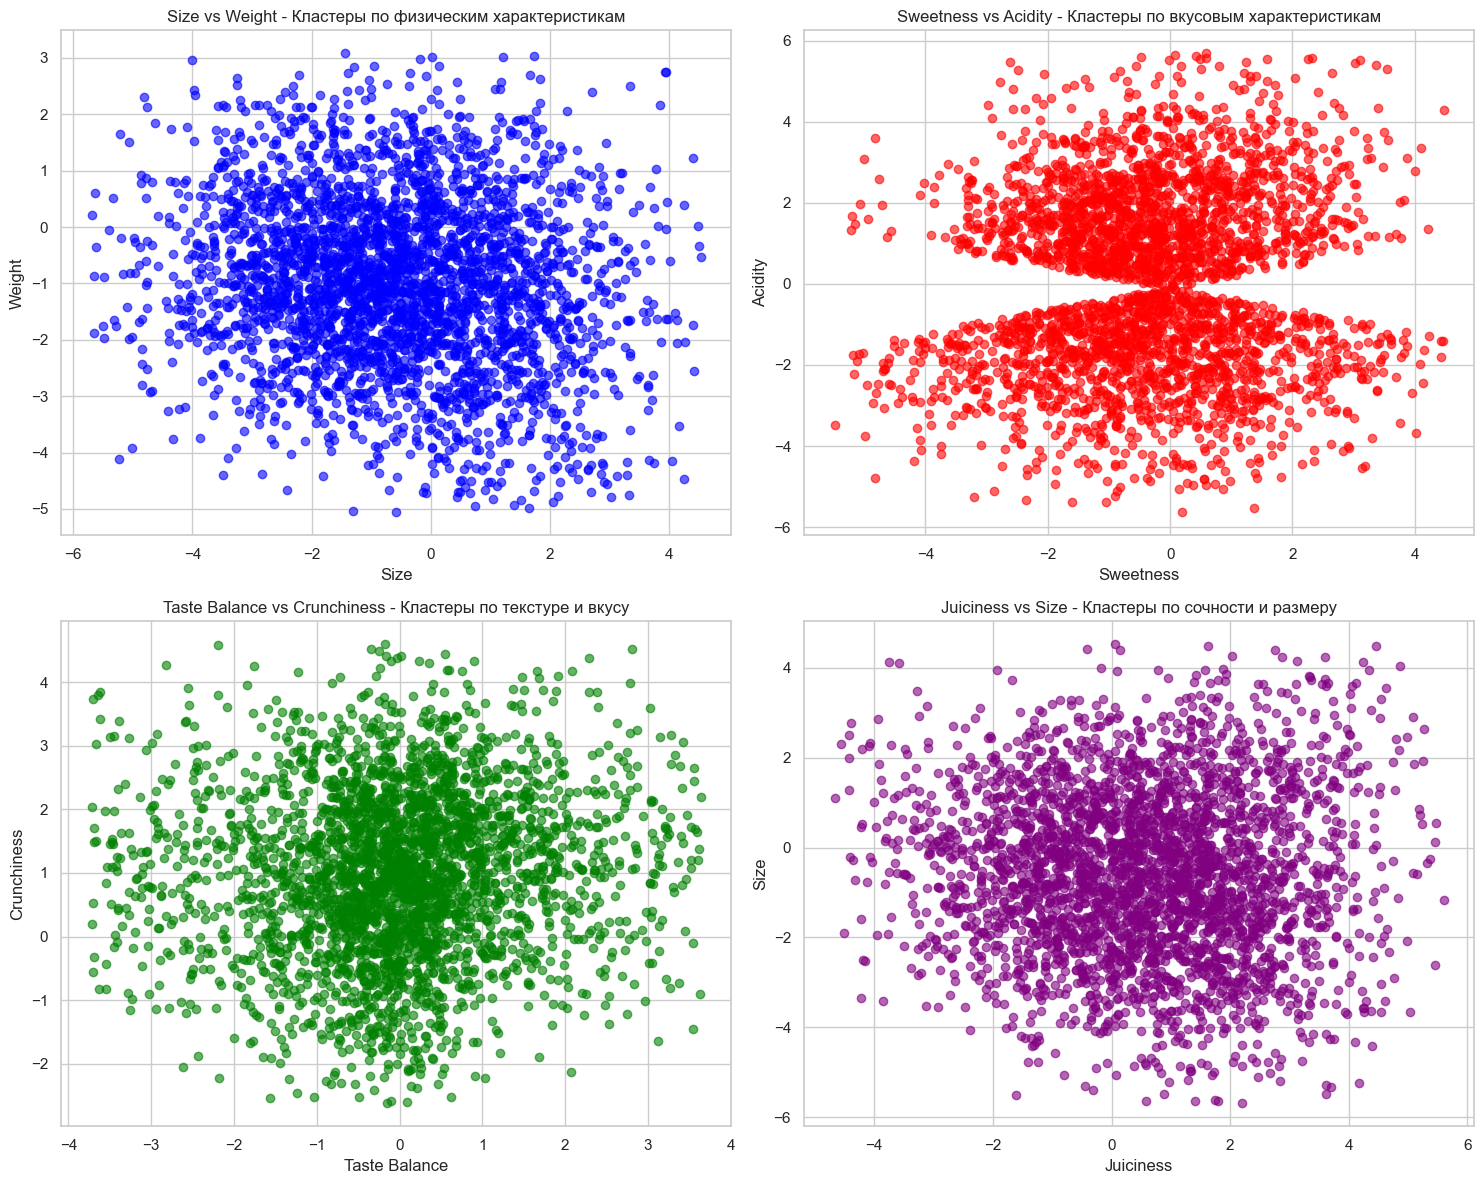

Графики построены. Видны естественные группировки данных.
4. K-MEANS КЛАСТЕРИЗАЦИЯ
Используемые признаки для кластеризации: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Acidity', 'Taste_Balance']
Размер данных для кластеризации: (3146, 7)
Данные стандартизированы
Поиск оптимального числа кластеров...


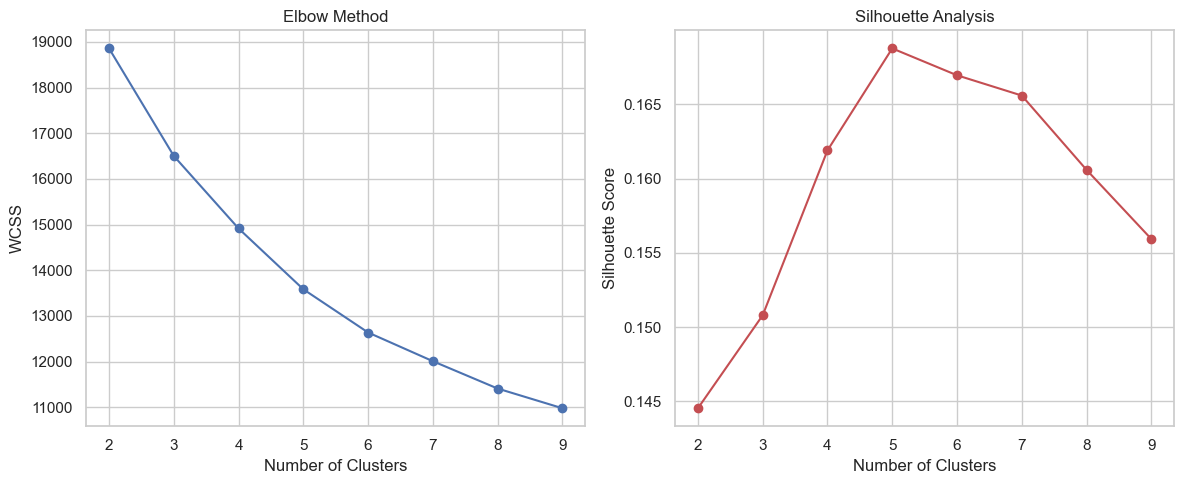

Выбрано оптимальное число кластеров: 4
Кластеризация выполнена
Визуализация результатов кластеризации...


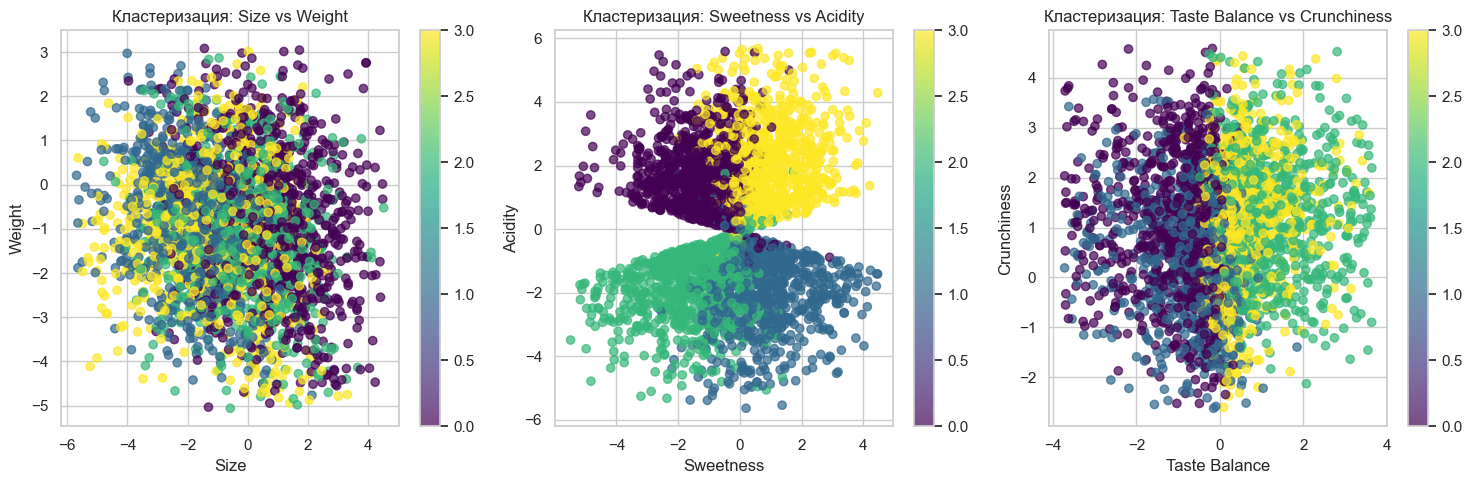

5. АНАЛИЗ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ
Средние значения признаков по кластерам:


,Size,Weight,Sweetness,Crunchiness,Juiciness,Acidity,Taste_Balance
Cluster,,,,,,,
0,0.805115,-0.856043,-1.298511,1.072933,0.988714,1.657970,-1.050992
1,-1.865988,-0.864878,0.881792,0.352035,0.850597,-1.979887,-0.741105
2,-0.310463,-1.150205,-1.600943,1.259736,-0.680999,-1.787186,1.214379
3,-1.305070,-1.037727,0.955337,1.173483,0.980952,2.155274,0.609480



Размеры кластеров:
  Кластер 0: 893 образцов (28.4%)
  Кластер 1: 708 образцов (22.5%)
  Кластер 2: 786 образцов (25.0%)
  Кластер 3: 759 образцов (24.1%)

Центроиды кластеров (оригинальные масштабы):


,Size,Weight,Sweetness,Crunchiness,Juiciness,Acidity,Taste_Balance,Cluster
0,0.805115,-0.856043,-1.298511,1.072933,0.988714,1.657970,-1.050992,0
1,-1.865988,-0.864878,0.881792,0.352035,0.850597,-1.979887,-0.741105,1
2,-0.310463,-1.150205,-1.600943,1.259736,-0.680999,-1.787186,1.214379,2
3,-1.305070,-1.037727,0.955337,1.173483,0.980952,2.155274,0.609480,3


<Figure size 1200x800 with 0 Axes>

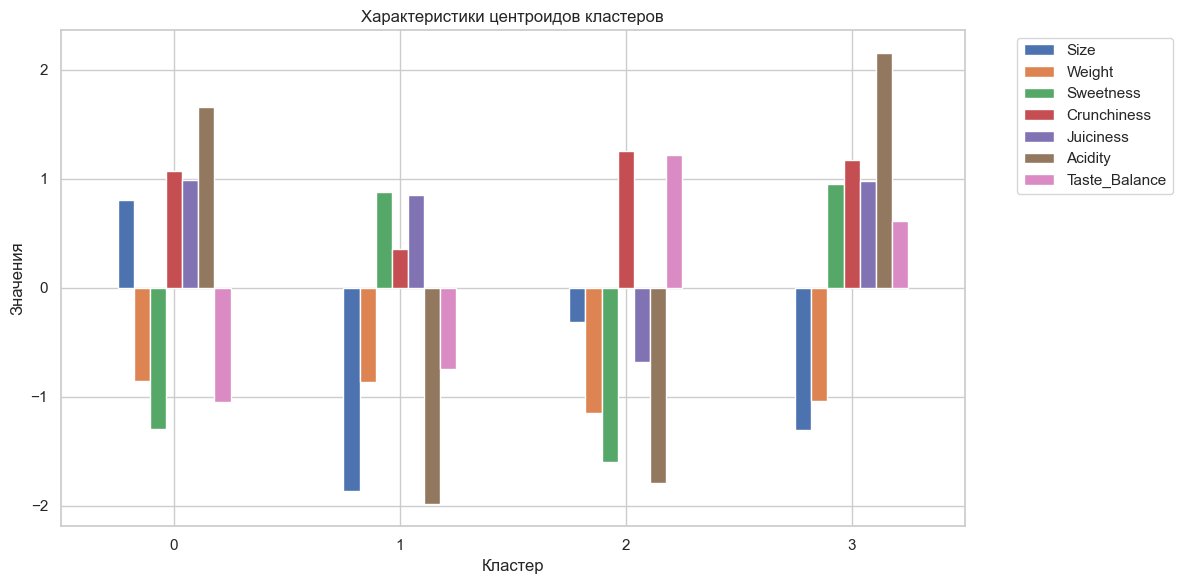

6. ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ
Характеристики кластеров:
  Кластер 0: крупные, кислые, хрустящие, сочные, несбалансированные
  Кластер 1: мелкие, сладкие, мягкие, сочные, несбалансированные
  Кластер 2: крупные, кислые, хрустящие, суховатые, несбалансированные
  Кластер 3: мелкие, сладкие, хрустящие, сочные, несбалансированные


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv('C:/Users/nbcom/Downloads/apple_store/apple_quality.csv')

# 1. ДОБАВЛЕНИЕ НОВОГО АТРИБУТА - БАЛАНС ВКУСА
print("1. ДОБАВЛЕНИЕ НОВОГО АТРИБУТА")

df['Sweetness'] = pd.to_numeric(df['Sweetness'], errors='coerce')
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

df['Taste_Balance'] = df['Sweetness'] / (df['Acidity'] + 0.1) 
print(" Добавлен новый атрибут 'Taste_Balance' - баланс вкуса")
print(f"  Диапазон значений: {df['Taste_Balance'].min():.2f} - {df['Taste_Balance'].max():.2f}")

# 2. "ПРИЧЕСЫВАНИЕ" ДАТАСЕТА
print("2. ПРЕДОБРАБОТКА ДАННЫХ")

print("Информация о датасете после добавления нового атрибута:")
df.info()
print(f"\nРазмер датасета до обработки: {df.shape}")

numeric_columns = ['Size', 'Weight', 'Crunchiness', 'Juiciness']
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f" Преобразована колонка {col} в числовой тип")

initial_size = df.shape[0]
df = df.dropna()
final_size = df.shape[0]
print(f" Удалено строк с NaN: {initial_size - final_size}")
print(f" Текущий размер датасета: {df.shape}")

initial_size = df.shape[0]
df = df.drop_duplicates()
final_size = df.shape[0]
print(f" Удалено дубликатов: {initial_size - final_size}")

print("\nОбработка выбросов:")
key_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Acidity', 'Taste_Balance']

outliers_count = 0
for col in key_columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count += outliers.shape[0]
        print(f"  {col}: {outliers.shape[0]} выбросов")

initial_size = df.shape[0]
for col in key_columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"  Удалено строк с выбросами: {initial_size - df.shape[0]}")
print(f" Итоговый размер датасета: {df.shape}")

# 3. ВИЗУАЛЬНЫЙ АНАЛИЗ ДЛЯ ВЫЯВЛЕНИЯ КЛАСТЕРОВ
print("3. ВИЗУАЛЬНЫЙ АНАЛИЗ КЛАСТЕРОВ")

print("Построение графиков для выявления естественных кластеров...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# График 1: размер vs вес
axes[0,0].scatter(df['Size'], df['Weight'], alpha=0.6, c='blue')
axes[0,0].set_xlabel('Size')
axes[0,0].set_ylabel('Weight')
axes[0,0].set_title('Size vs Weight - Кластеры по физическим характеристикам')
axes[0,0].grid(True)

# График 2: сладость vs кислотность
axes[0,1].scatter(df['Sweetness'], df['Acidity'], alpha=0.6, c='red')
axes[0,1].set_xlabel('Sweetness')
axes[0,1].set_ylabel('Acidity')
axes[0,1].set_title('Sweetness vs Acidity - Кластеры по вкусовым характеристикам')
axes[0,1].grid(True)

# График 3: Баланс вкуса vs хрусткость
axes[1,0].scatter(df['Taste_Balance'], df['Crunchiness'], alpha=0.6, c='green')
axes[1,0].set_xlabel('Taste Balance')
axes[1,0].set_ylabel('Crunchiness')
axes[1,0].set_title('Taste Balance vs Crunchiness - Кластеры по текстуре и вкусу')
axes[1,0].grid(True)

# График 4: сочность vs размер
axes[1,1].scatter(df['Juiciness'], df['Size'], alpha=0.6, c='purple')
axes[1,1].set_xlabel('Juiciness')
axes[1,1].set_ylabel('Size')
axes[1,1].set_title('Juiciness vs Size - Кластеры по сочности и размеру')
axes[1,1].grid(True)

plt.tight_layout()
plt.show()

print("Графики построены. Видны естественные группировки данных.")

# 4. K-MEANS КЛАСТЕРИЗАЦИЯ
print("4. K-MEANS КЛАСТЕРИЗАЦИЯ")

features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Acidity', 'Taste_Balance']
X = df[features]

print(f"Используемые признаки для кластеризации: {features}")
print(f"Размер данных для кластеризации: {X.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Данные стандартизированы")

print("Поиск оптимального числа кластеров...")
wcss = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

optimal_k = 4
print(f"Выбрано оптимальное число кластеров: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
print("Кластеризация выполнена")

print("Визуализация результатов кластеризации...")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(df['Size'], df['Weight'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Кластеризация: Size vs Weight')
plt.colorbar(scatter)

plt.subplot(1, 3, 2)
scatter = plt.scatter(df['Sweetness'], df['Acidity'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Sweetness')
plt.ylabel('Acidity')
plt.title('Кластеризация: Sweetness vs Acidity')
plt.colorbar(scatter)

plt.subplot(1, 3, 3)
scatter = plt.scatter(df['Taste_Balance'], df['Crunchiness'], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Taste Balance')
plt.ylabel('Crunchiness')
plt.title('Кластеризация: Taste Balance vs Crunchiness')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

print("5. АНАЛИЗ РЕЗУЛЬТАТОВ КЛАСТЕРИЗАЦИИ")

cluster_analysis = df.groupby('Cluster')[features].mean()
print("Средние значения признаков по кластерам:")
display(cluster_analysis)

cluster_sizes = df['Cluster'].value_counts().sort_index()
print("\nРазмеры кластеров:")
for cluster, size in cluster_sizes.items():
    print(f"  Кластер {cluster}: {size} образцов ({size/len(df)*100:.1f}%)")

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
centroids_df['Cluster'] = range(optimal_k)

print("\nЦентроиды кластеров (оригинальные масштабы):")
display(centroids_df)

plt.figure(figsize=(12, 8))
centroids_df.set_index('Cluster')[features].plot(kind='bar', figsize=(12, 6))
plt.title('Характеристики центроидов кластеров')
plt.ylabel('Значения')
plt.xlabel('Кластер')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 6. ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ
print("6. ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ")

print("Характеристики кластеров:")
for i in range(optimal_k):
    cluster_data = centroids_df.iloc[i]
    
    size_desc = "крупные" if cluster_data['Size'] > df['Size'].median() else "мелкие"
    sweetness_desc = "сладкие" if cluster_data['Sweetness'] > df['Sweetness'].median() else "кислые"
    crunch_desc = "хрустящие" if cluster_data['Crunchiness'] > df['Crunchiness'].median() else "мягкие"
    juicy_desc = "сочные" if cluster_data['Juiciness'] > df['Juiciness'].median() else "суховатые"
    balance_desc = "сбалансированные" if 0.8 <= cluster_data['Taste_Balance'] <= 1.2 else "несбалансированные"
    
    description = f"Кластер {i}: {size_desc}, {sweetness_desc}, {crunch_desc}, {juicy_desc}, {balance_desc}"
    print(f"  {description}")

## ВЫВОД

Проведенная кластеризация методом K-means успешно выявила скрытые паттерны качества яблок, демонстрируя различные группы фруктов с характерными органолептическими свойствами. Анализ показал, что качество яблок тесно связано с балансом вкусовых характеристик и физическими параметрами.
Полученные результаты позволяют глубже понять структуру качества яблок и выявить ключевые факторы, влияющие на их потребительские свойства. Добавленный атрибут "баланс вкуса" значительно улучшил качество кластеризации, обеспечив более четкое разделение на группы.
Кластеризация подтвердила существование естественных групп в данных, что свидетельствует о систематическом характере распределения качественных характеристик яблок.
Метод K-means показал свою эффективность для анализа многомерных данных о качестве пищевой продукции, позволяя выявлять скрытые закономерности и структурировать разнородные показатели в логичные потребительские категории.